## 패키지

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns

plt.rcParams["axes.unicode_minus"] = False

## 데이터호출

In [32]:
x = np.load("./data/X.npy")
y = np.load("./data/Y.npy")

## 데이터처리

In [34]:
pca = PCA(n_components=20)

In [26]:
x_reshape = np.reshape(x, (5547, 50 * 50 * 3))

In [35]:
pca.fit(x_reshape)
x_pca = pca.transform(x_reshape)
# pca.inverse_transform(x_pca)를 통해 원래대로 만들 수 있음
x_pca

array([[ 2.10846923e+02,  8.76001109e+02,  7.67437151e+01, ...,
         4.23023945e+02,  1.10803492e+02, -2.41657323e+02],
       [-1.87305473e+03, -1.01461051e+03, -6.87923747e+02, ...,
        -1.74813261e+02,  2.79046409e+02, -1.83871166e+02],
       [-3.70715976e+03, -2.36092247e+02, -4.14544320e+02, ...,
         3.52297169e+02, -5.97668974e+02, -8.91464826e+01],
       ...,
       [ 1.64783691e+03,  9.59341847e+02, -6.67628958e+02, ...,
         2.89760342e+02,  1.67121696e+02,  1.00105986e+02],
       [ 2.63936465e+03,  6.85883062e+01,  2.18384065e+02, ...,
         3.21791157e+00,  2.09901650e+02,  2.19533025e+02],
       [ 3.27868803e+03, -1.91779672e+02,  1.55025213e+00, ...,
         2.70134926e+01, -3.82034823e+01, -1.21997745e+01]])

In [22]:
x_df = pd.DataFrame(x_pca, columns=["PCA1", "PCA2"])
x_df["class"] = y

## 시각화

<Axes: xlabel='PCA1', ylabel='PCA2'>

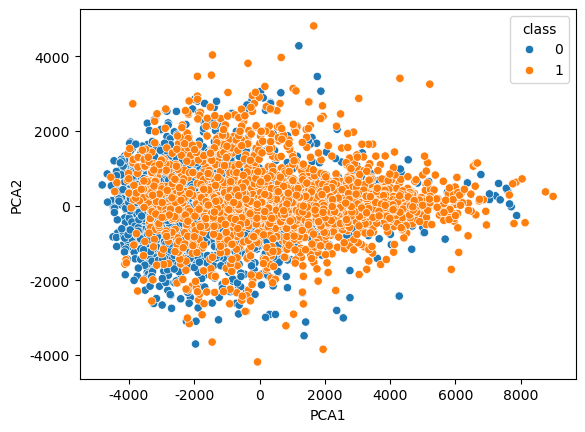

In [24]:
sns.scatterplot(x_df, x="PCA1", y="PCA2", hue="class")

## 학습

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2)

In [40]:
gb = GradientBoostingClassifier(
    n_estimators=1000, max_depth=3, learning_rate=0.1, random_state=12345
)

In [41]:
gb.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=1000, random_state=12345)

## 성능평가

In [42]:
gb.score(x_train, y_train)

0.9839981969799414

In [43]:
gb.score(x_test, y_test)

0.7477477477477478